# Example Out-of-Framework file
This file demonstrates how one can access the modules at different levels of abstraction (highest: access via MnistExperiment, lowest: MnistDataset)
## Analysis of MNIST

### Access via MnistExperiment

In [1]:
import os
from src.datasets.mnist_dataset import MnistDataset, MnistDatasetArgs
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig()
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from src.experiments.mnist_experiment import MnistExperiment, MnistExperimentArgs






/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
ex = MnistExperiment(MnistExperimentArgs(hidden_sizes=[64], experiment_id="mnist", use_cuda=False).model_dump(), yaml_config.config)

train = ex._create_dataset("train")
val = ex._create_dataset("val")
test = ex._create_dataset("test")

sample = train[0]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

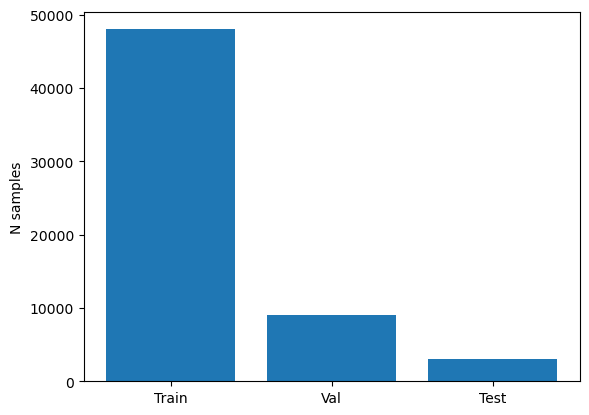

In [5]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

### Access via MnistDataset module

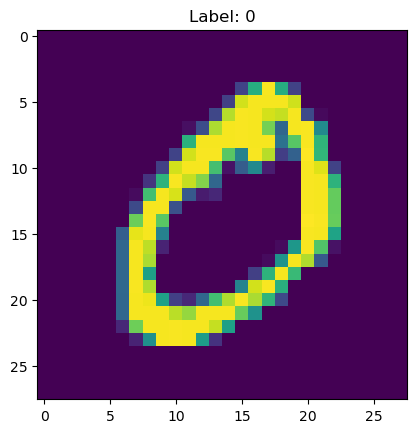

In [10]:
mnist_data = MNIST(
    os.path.join(yaml_config.config.cache_dir, "mnist"),
    download=True,
)

config = MnistDatasetArgs()
train = MnistDataset(mnist_data, config, yaml_config.config, "train")
val = MnistDataset(mnist_data, config, yaml_config.config, "val")
test = MnistDataset(mnist_data, config, yaml_config.config, "test")

sample = train[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

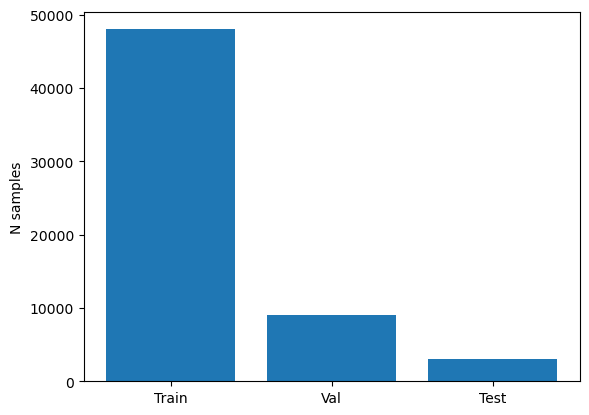

In [13]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9809059..2.2184875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


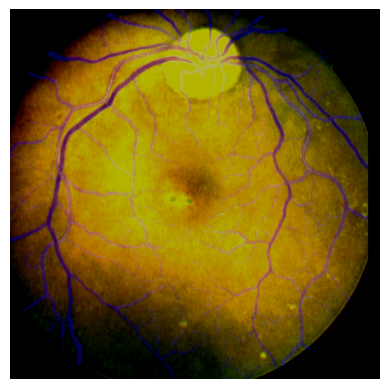

In [46]:
from src.datasets.drive_dataset import DriveDataset, DriveDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import torch
yaml_config = YamlConfig()
config = DriveDatasetArgs()
ds = DriveDataset(config, yaml_config.config)
sample = ds[1]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.3  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

In [47]:
import kagglehub

path = kagglehub.dataset_download("khoongweihao/chasedb1", path = yaml_config.config.cache_dir)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/khoongweihao/chasedb1/versions/1
Please make sure you specified the correct resource identifiers.

In [5]:
from src.datasets.refuge_dataset import RefugeDataset, RefugeDatasetArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig()
config = RefugeDatasetArgs(target="disc")
ds = RefugeDataset(config, yaml_config.config)
sample = ds[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

NameError: name 'plt' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


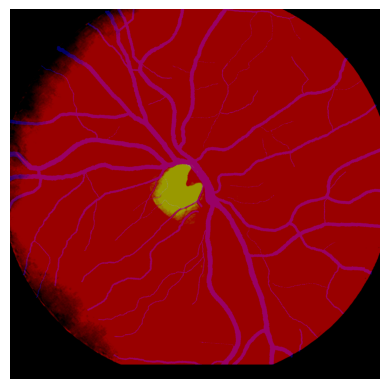

In [7]:
from src.datasets.chasedb1_dataset import ChaseDb1Dataset, ChaseDb1DatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import torch
yaml_config = YamlConfig()
config = ChaseDb1DatasetArgs()
ds = ChaseDb1Dataset(config, yaml_config.config)
sample = ds[4]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.4  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

In [5]:
from src.experiments.ukbiobank_experiment import UkBioBankExperiment, UkBiobankExperimentArgs
from src.args.yaml_config import YamlConfig
import matplotlib.pyplot as plt

yaml_config = YamlConfig()
config = UkBiobankExperimentArgs(sam_model="vit_b", experiment_id="uk_biobank", drive_test_equals_val=False)
exp = UkBioBankExperiment(config.model_dump(), yaml_config.config)

train = exp._create_dataset("train")
val = exp._create_dataset("val")
test = exp._create_dataset("test")

# Display samples sizes as hist
lens = {
    "train": len(train), 
    "val": len(val),
    "test": len(test)
}
lens

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded


/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/auto_sam_prompt_encoder/hardnet.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.l

{'train': 83414, 'val': 15, 'test': 14}

In [2]:
from pydantic import BaseModel

class A(BaseModel):
    a: int = 69 

class B(BaseModel):
    a: int


class C(A,B):
    pass

C().a

69

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..5.021779].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


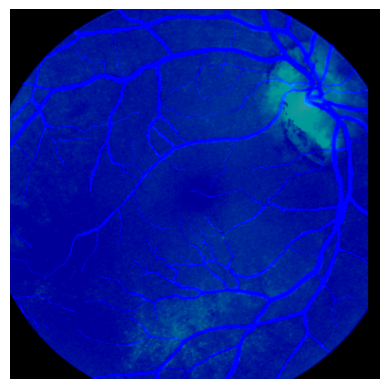

In [1]:
from src.datasets.joined_retina_dataset import JoinedRetinaDataset, JoinedRetinaDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config)
sample = ds[4]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.4  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

Text(0, 0.5, 'N samples')

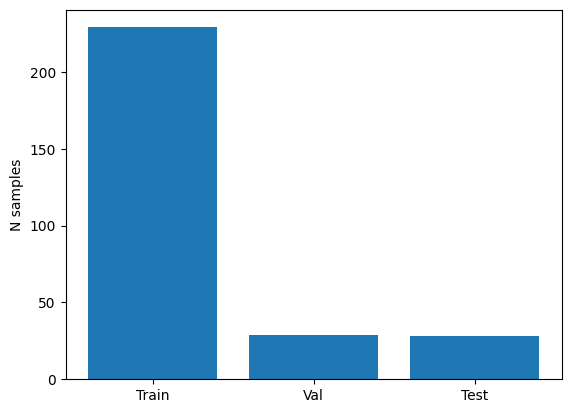

In [2]:
train, val, test = ds.get_split("train"), ds.get_split("val"), ds.get_split("test")
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

In [7]:
from src.datasets.aria_dataset import ARIADataset


aria = ARIADataset(config=config, yaml_config=yaml_config)
len(aria)

143